In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/Users/hadoop/Downloads/train.csv')

In [31]:
data.shape

(42000, 785)

In [ ]:
data.info()

In [ ]:
data.describe()

In [62]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 785 columns):
label       42000 non-null int64
pixel0      42000 non-null int64
pixel1      42000 non-null int64
pixel2      42000 non-null int64
pixel3      42000 non-null int64
pixel4      42000 non-null int64
pixel5      42000 non-null int64
pixel6      42000 non-null int64
pixel7      42000 non-null int64
pixel8      42000 non-null int64
pixel9      42000 non-null int64
pixel10     42000 non-null int64
pixel11     42000 non-null int64
pixel12     42000 non-null int64
pixel13     42000 non-null int64
pixel14     42000 non-null int64
pixel15     42000 non-null int64
pixel16     42000 non-null int64
pixel17     42000 non-null int64
pixel18     42000 non-null int64
pixel19     42000 non-null int64
pixel20     42000 non-null int64
pixel21     42000 non-null int64
pixel22     42000 non-null int64
pixel23     42000 non-null int64
pixel24     42000 non-null int64
pixel25     42000 non-null int64

In [32]:
data.iloc[:,0].head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,1:].values,data.iloc[:,0].values,random_state=42, stratify=data.iloc[:,0].values)

In [35]:
X_train[0:5,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
y_train = y_train.reshape(-1,1)

In [32]:
y_train

array([4, 2, 5, ..., 2, 8, 0])

In [33]:
X_test[0:5,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
y_test = y_test.reshape(-1, 1)

In [34]:
y_test

array([8, 5, 2, ..., 9, 9, 9])

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier()

In [11]:
knn.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
y_resp = knn.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,y_resp)

0.96476190476190471

In [23]:
neighbors = range(3,8)

In [24]:
neighbors

range(3, 8)

In [25]:
test_accuracy = np.empty(len(neighbors))

In [26]:
train_accuracy = np.empty(len(neighbors))

In [27]:
knn = KNeighborsClassifier()
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
   # y_resp =  knn.predict(X_test)
    #test_accuracy[i] = accuracy_score(y_test,y_resp)
    #test_accuracy[i] = knn.score(y_test,y_resp)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
    

In [28]:
test_accuracy

array([ 0.96561905,  0.96409524,  0.9647619 ,  0.96504762,  0.96342857])

In [29]:
import matplotlib.pyplot as plt

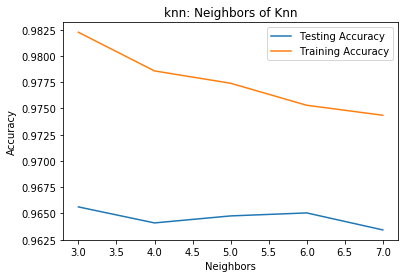

In [31]:
plt.title('knn: Neighbors of Knn')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

It is clear that the ideal value for k - k_neighbors is 3.
We will now refit the model with the entire training data with the k value as 3

In [49]:
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data.iloc[:,1:].values,data.iloc[:,0].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [48]:
realdata = pd.read_csv('/Users/hadoop/Downloads/test.csv')

In [42]:
realdata.shape

(28000, 784)

In [44]:
realdata.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 784 columns):
pixel0      28000 non-null int64
pixel1      28000 non-null int64
pixel2      28000 non-null int64
pixel3      28000 non-null int64
pixel4      28000 non-null int64
pixel5      28000 non-null int64
pixel6      28000 non-null int64
pixel7      28000 non-null int64
pixel8      28000 non-null int64
pixel9      28000 non-null int64
pixel10     28000 non-null int64
pixel11     28000 non-null int64
pixel12     28000 non-null int64
pixel13     28000 non-null int64
pixel14     28000 non-null int64
pixel15     28000 non-null int64
pixel16     28000 non-null int64
pixel17     28000 non-null int64
pixel18     28000 non-null int64
pixel19     28000 non-null int64
pixel20     28000 non-null int64
pixel21     28000 non-null int64
pixel22     28000 non-null int64
pixel23     28000 non-null int64
pixel24     28000 non-null int64
pixel25     28000 non-null int64
pixel26     28000 non-null int64

In [52]:
realdata.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [53]:
Label=knn.predict(realdata.values)

In [54]:
Label

array([2, 0, 9, ..., 3, 9, 2])

In [68]:
result = pd.Series(Label)

In [70]:
## to shift the index by 1 
result.index = result.index + 1 

In [71]:
result.head()

1    2
2    0
3    9
4    9
5    3
dtype: int64

In [72]:
result.to_csv('/Users/hadoop/Python Notebook/DigitRecognition_Result.csv')